# Clustering: Isolation Forest Visualzation Use Case

Based on Andy McDonald's work (YouTube: [Andy McDonald](https://www.youtube.com/watch?v=O9VvmWj-JAk)).

## Importing Libraries & Data

The idea is that anomalies are few and different, so the Isolation Forest algorithm isolates anomalies instead of profiling normal data points. It does this by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The number of splits required to isolate a point is the anomaly score, with lower scores indicating anomalies.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv(r'/Users/davidtbo/Library/Mobile Documents/com~apple~CloudDocs/data/external/german_credit.csv')

In [3]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

## Building an Isolation Forest Model (2 Features)

In [22]:
anomaly_inputs = ['credit_amount', 'age']

In [29]:
model_IF = IsolationForest(contamination=0.05, random_state=42)

In [30]:
model_IF.fit(df[anomaly_inputs])

,n_estimators,100
,max_samples,'auto'
,contamination,0.05
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [ ]:
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs]) # <0 is an outlier, >0 is an inlier

In [32]:
df['anomaly'] = model_IF.predict(df[anomaly_inputs])

In [33]:
df.loc[:, ['credit_amount', 'age','anomaly_scores','anomaly'] ]

,credit_amount,age,anomaly_scores,anomaly
0,1169,67,-0.004742,-1
1,5951,22,0.040490,1
2,2096,49,0.117143,1
3,7882,45,0.051116,1
4,4870,53,0.041043,1
...,...,...,...,...
995,1736,31,0.176705,1
996,3857,40,0.147507,1
997,804,38,0.129526,1
998,1845,23,0.151174,1


In [34]:
def outlier_plot(data, outlier_method_name, x_var, y_var, 
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name}')
    
    method = f'{outlier_method_name}_anomaly'
    
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')
    
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

Outlier Method: Isolation Forest
Number of anomalous values 50
Number of non anomalous values  950
Total Number of Values: 1000


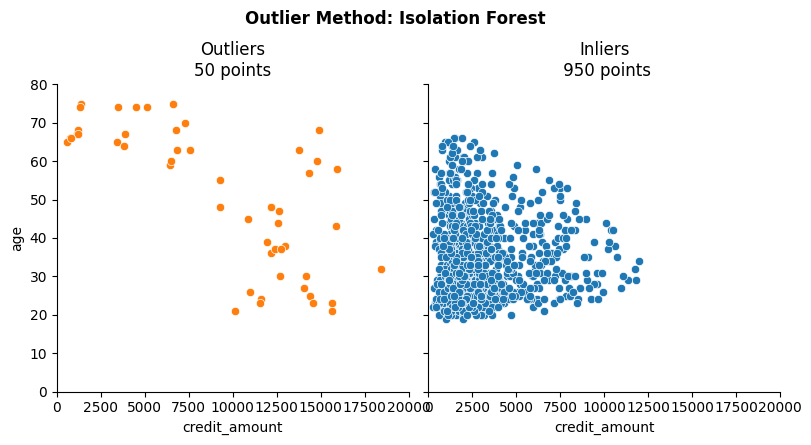

In [35]:
outlier_plot(df, 'Isolation Forest', 'credit_amount', 'age', [0, 20000], [0, 80]);

## Building an Isolation Forest Model Using Multiple Features

In [38]:
anomaly_inputs = ['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']

In [39]:
anomaly_inputs = ['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']
model_IF = IsolationForest(contamination=0.05, random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])


Outlier Method: Isolation Forest
Number of anomalous values 50
Number of non anomalous values  950
Total Number of Values: 1000


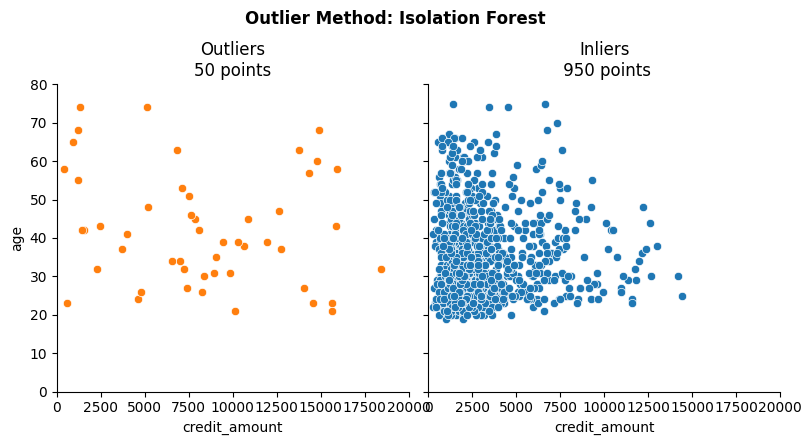

In [40]:
outlier_plot(df, 'Isolation Forest', 'credit_amount', 'age', [0, 20000], [0, 80]);

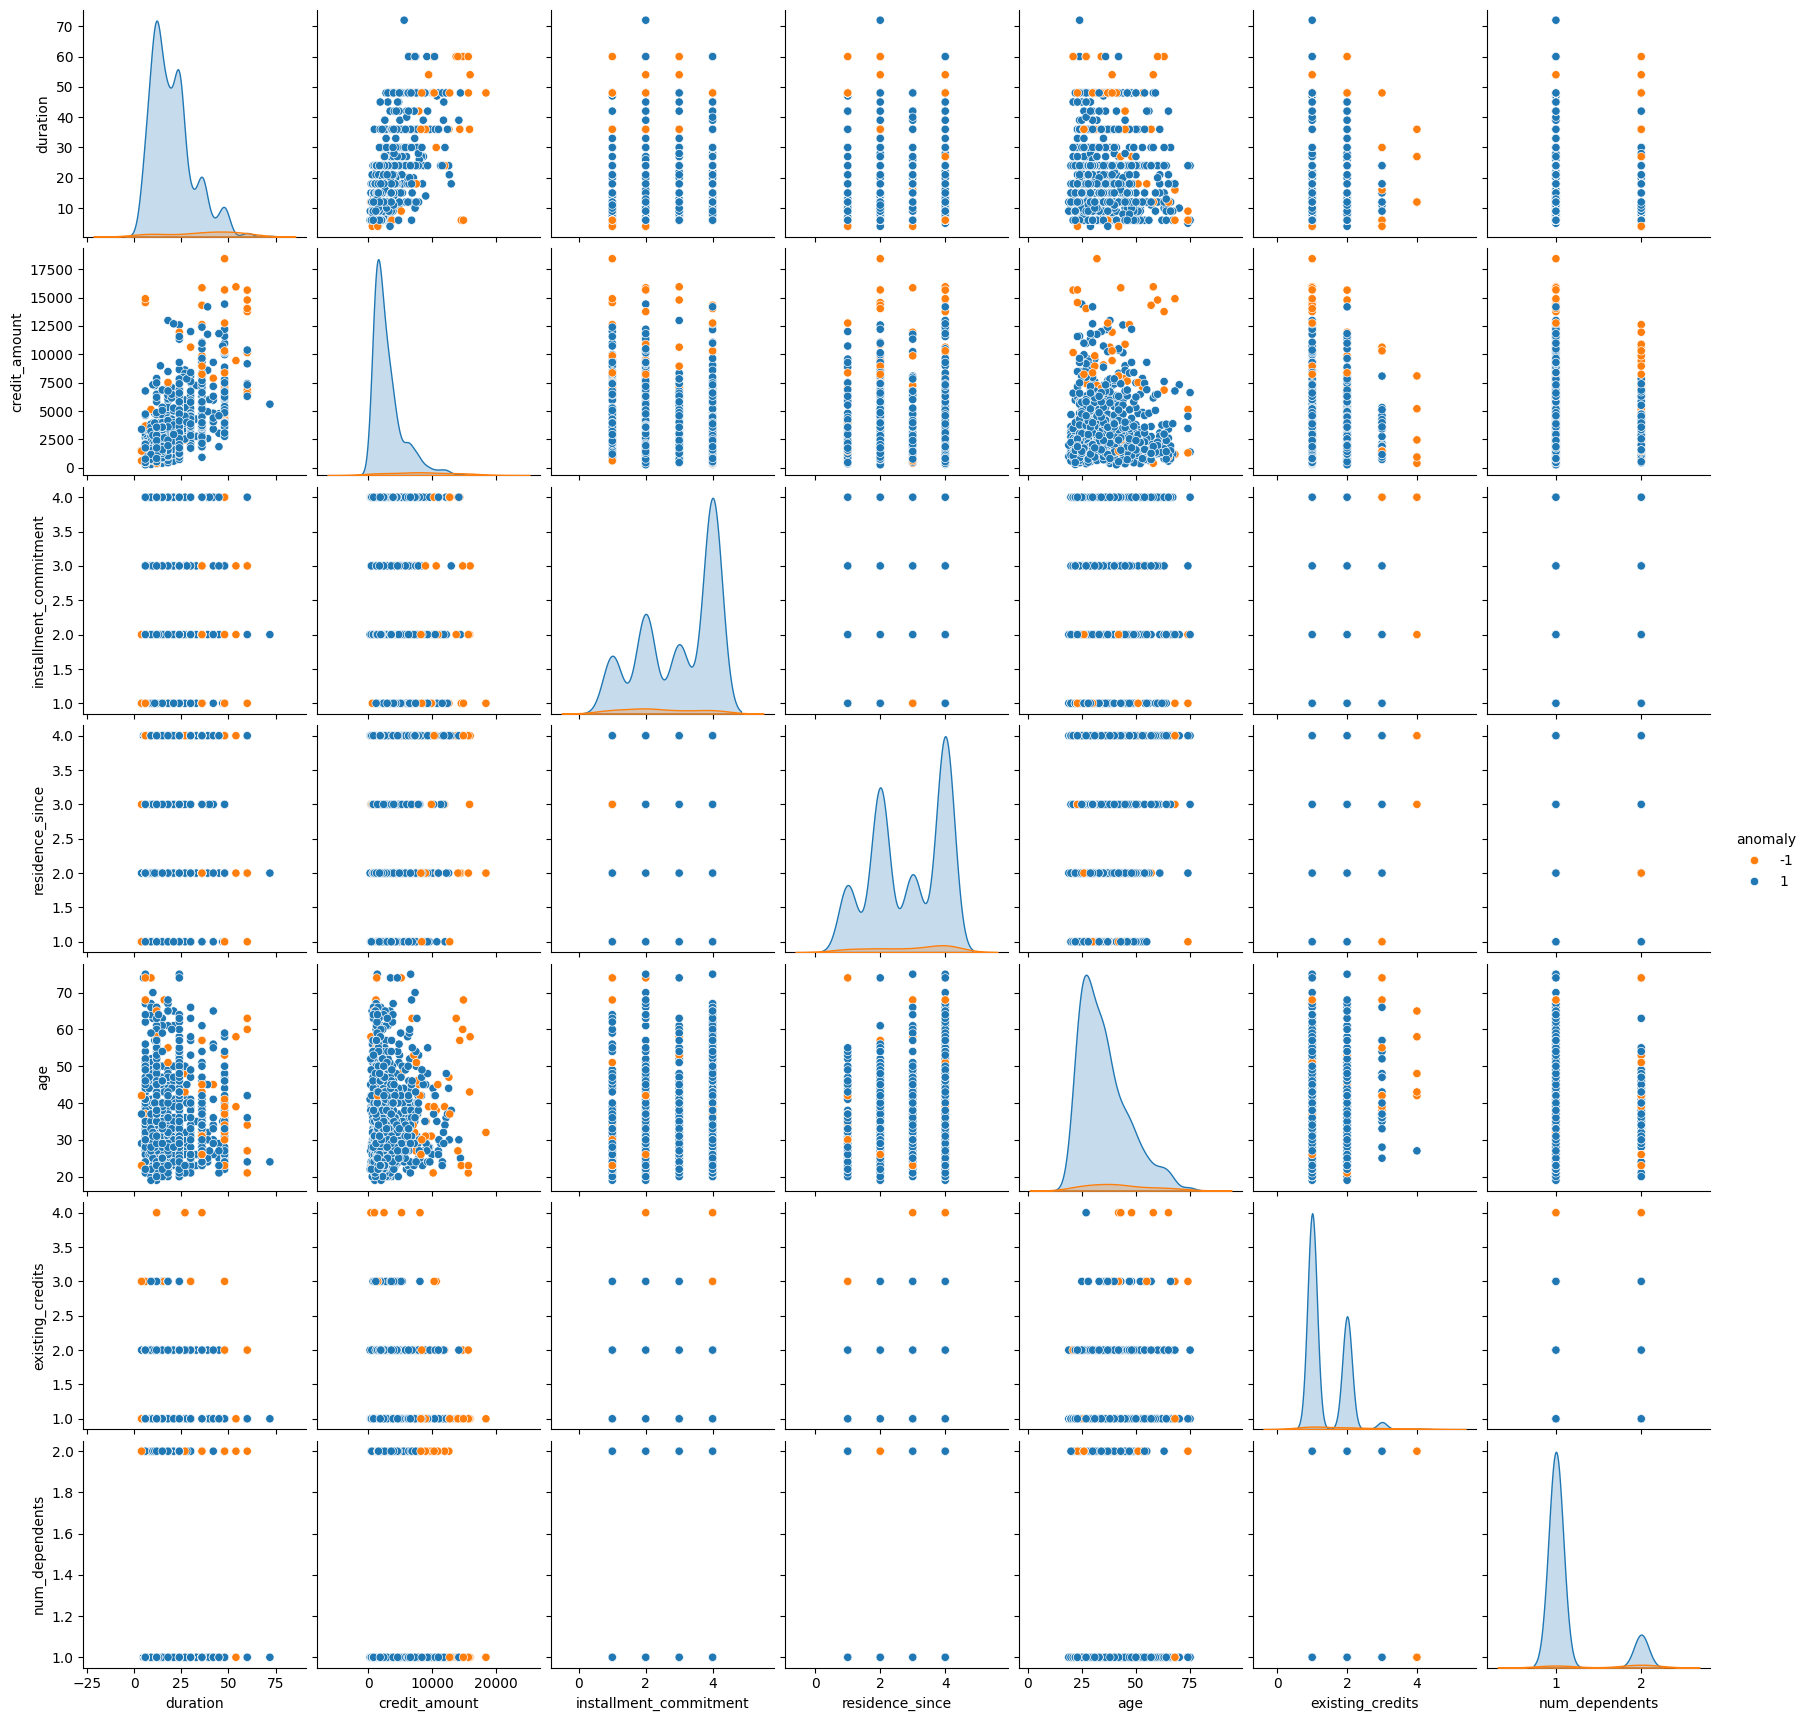

In [41]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)